In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, RationalQuadratic, DotProduct
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

%matplotlib inline


# Exam Topic

Gaussian Processes (GPs) are a non-parametric, probabilistic approach in machine learning, extending Gaussian distributions to functions.

A Gaussian dsitribution is defined as $\mathbf{X} \sim \mathcal{N}(\mu, \Sigma)$

A Gaussian process is defined as $f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x^{\prime}}))$, where $E(f(x)) = m(x)$ and $Cov(f(x), f(x^{\prime})) = k(x, x^{\prime})$

The mean function is often assumed to be zero. The covariance function, or kernel, defines the relationship between different points in the input space.

Here is an exmaple of a linear kernel $k(x, x^{\prime}) = x^Tx$ with mean set to 0.
![linear kernel](screenshot_1.png)

# Exam Topic End

# Part 1: Kernels

Below we implement a couple of kernels

In [2]:
def exponentiated_quadratic(xa, xb, sigma=1, length_scale=1):
    """Exponentiated quadratic  with σ=1 and ℓ=1."""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')/length_scale
    return (sigma**2) * np.exp(sq_norm)


In [3]:
def periodic_kernel(xa, xb, period=1, length_scale=1, sigma=1):
    """ Periodic kernel with period=1 and length_scale=1"""
    l1_norm =  scipy.spatial.distance.cdist(xa, xb, 'minkowski', p=1)
    return sigma**2 * np.exp(-2/length_scale**2 * (np.sin(np.pi * l1_norm/period)**2))


In [4]:
def linear_kernel(xa, xb):
    return xa@xb.T


Let's make a few illustrations following the same theme as in the slides

In [5]:
dim = 50
num_samples = 5
X = np.expand_dims(np.linspace(-4, 4, dim), 1)
X.shape


(50, 1)

<Axes: >

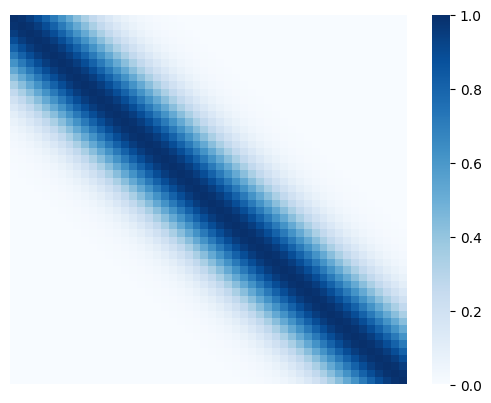

In [6]:
COV = exponentiated_quadratic(X, X, length_scale=1)
plt.figure()
sns.heatmap(COV, cmap='Blues', xticklabels=False, yticklabels=False)


Text(0, 0.5, '$f(x)$')

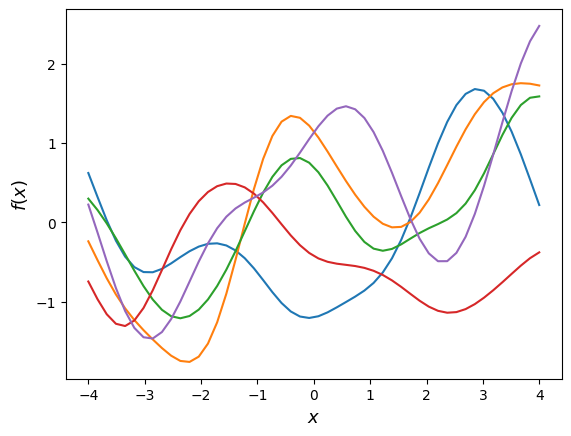

In [7]:
mean = np.zeros((COV.shape[0],))
x = np.random.multivariate_normal(mean.squeeze(), COV, size=num_samples)
for i in range(num_samples):
    plt.plot(X.squeeze(), x[i], '-')
plt.xlabel(r'$x$', fontsize=13)
plt.ylabel(r'$f(x)$', fontsize=13)


Text(0, 0.5, '$k(x_a,x_b)$')

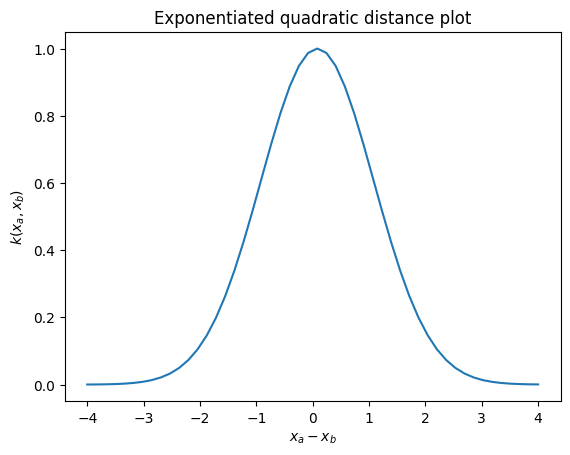

In [8]:
plt.plot(X, COV[25, :], '-', label=f'$l=${1}')
plt.title('Exponentiated quadratic distance plot')
plt.xlabel(r'$x_a-x_b$')
plt.ylabel(r'$k(x_a,x_b)$')


### Exercise

This exericse is mostly about familiarising yourself with the kernels
1. Using the kernel implementations and visualizations above, investigate the effect of changing the kernel parameters.
2. Define new kernels using kernel combinations (addition and multiplication). Explore the effect of different combinations and varying kernl parameters. 

<Axes: >

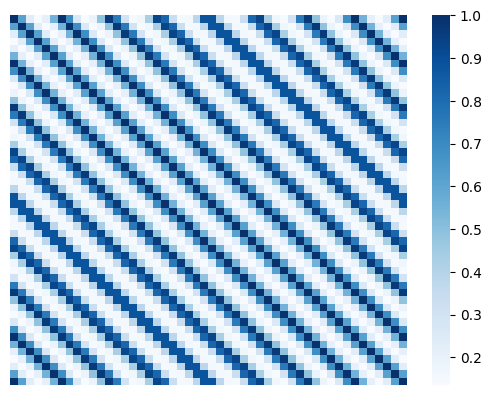

In [9]:
dim = 50
num_samples = 5
X = np.expand_dims(np.linspace(-4, 4, dim), 1)
X.shape

COV = periodic_kernel(X, X, length_scale=1)
plt.figure()
sns.heatmap(COV, cmap='Blues', xticklabels=False, yticklabels=False)


Text(0, 0.5, '$f(x)$')

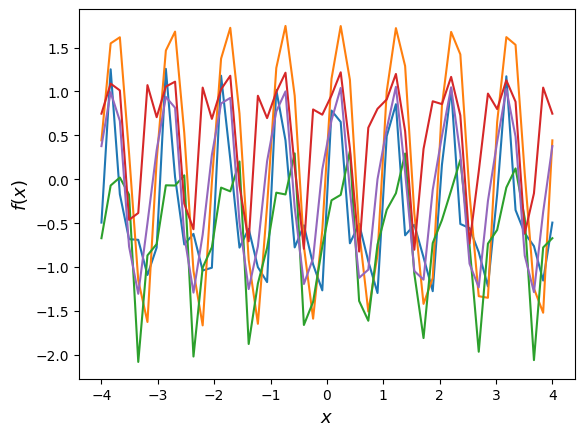

In [10]:
mean = np.zeros((COV.shape[0],))
x = np.random.multivariate_normal(mean.squeeze(), COV, size=num_samples)
for i in range(num_samples):
    plt.plot(X.squeeze(), x[i], '-')
plt.xlabel(r'$x$', fontsize=13)
plt.ylabel(r'$f(x)$', fontsize=13)


Text(0, 0.5, '$k(x_a,x_b)$')

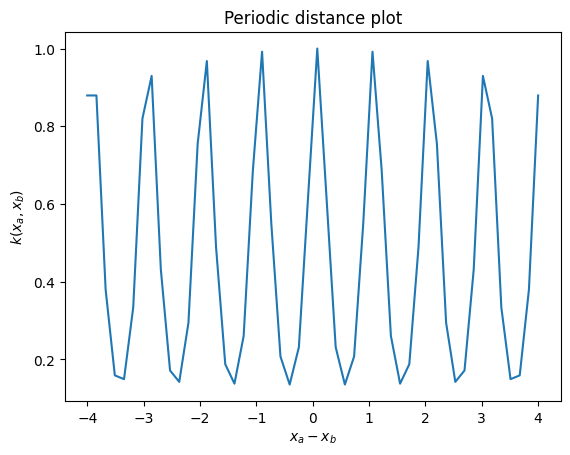

In [11]:
plt.plot(X, COV[25, :], '-', label=f'$l=${1}')
plt.title('Periodic distance plot')
plt.xlabel(r'$x_a-x_b$')
plt.ylabel(r'$k(x_a,x_b)$')


<Axes: >

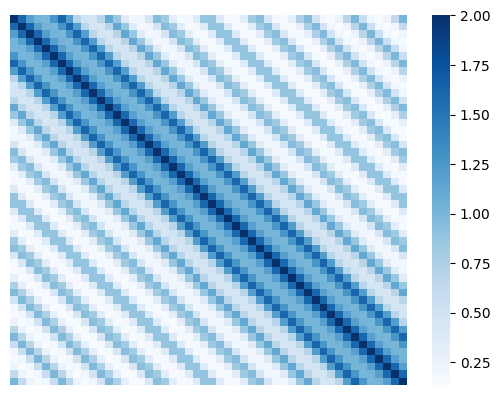

In [12]:
dim = 50
num_samples = 5
X = np.expand_dims(np.linspace(-4, 4, dim), 1)
X.shape

COV = periodic_kernel(X, X, length_scale=1)+exponentiated_quadratic(X, X, length_scale=1)
plt.figure()
sns.heatmap(COV, cmap='Blues', xticklabels=False, yticklabels=False)


Text(0, 0.5, '$f(x)$')

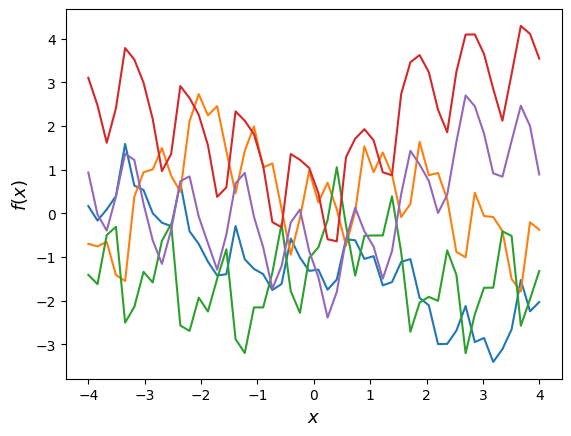

In [13]:
mean = np.zeros((COV.shape[0],))
x = np.random.multivariate_normal(mean.squeeze(), COV, size=num_samples)
for i in range(num_samples):
    plt.plot(X.squeeze(), x[i], '-')
plt.xlabel(r'$x$', fontsize=13)
plt.ylabel(r'$f(x)$', fontsize=13)


Text(0, 0.5, '$k(x_a,x_b)$')

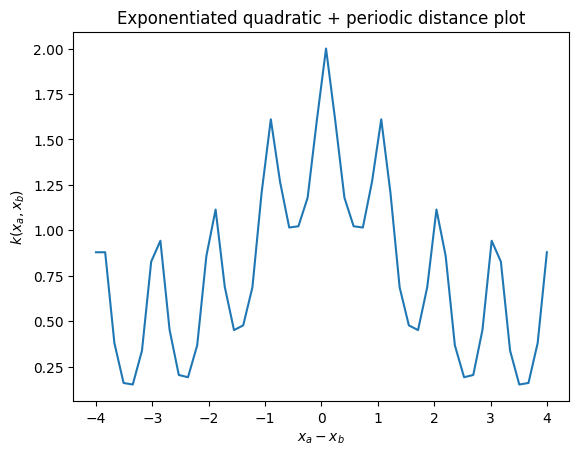

In [14]:
plt.plot(X, COV[25, :], '-', label=f'$l=${1}')
plt.title('Exponentiated quadratic + periodic distance plot')
plt.xlabel(r'$x_a-x_b$')
plt.ylabel(r'$k(x_a,x_b)$')


<Axes: >

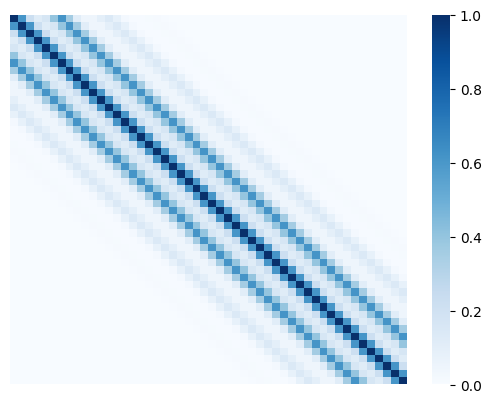

In [15]:
dim = 50
num_samples = 5
X = np.expand_dims(np.linspace(-4, 4, dim), 1)
X.shape

COV = periodic_kernel(X, X, length_scale=1)*exponentiated_quadratic(X, X, length_scale=1)
plt.figure()
sns.heatmap(COV, cmap='Blues', xticklabels=False, yticklabels=False)


Text(0, 0.5, '$f(x)$')

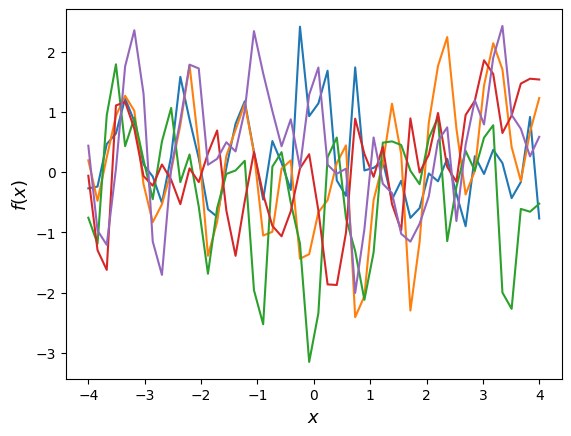

In [16]:
mean = np.zeros((COV.shape[0],))
x = np.random.multivariate_normal(mean.squeeze(), COV, size=num_samples)
for i in range(num_samples):
    plt.plot(X.squeeze(), x[i], '-')
plt.xlabel(r'$x$', fontsize=13)
plt.ylabel(r'$f(x)$', fontsize=13)


Text(0, 0.5, '$k(x_a,x_b)$')

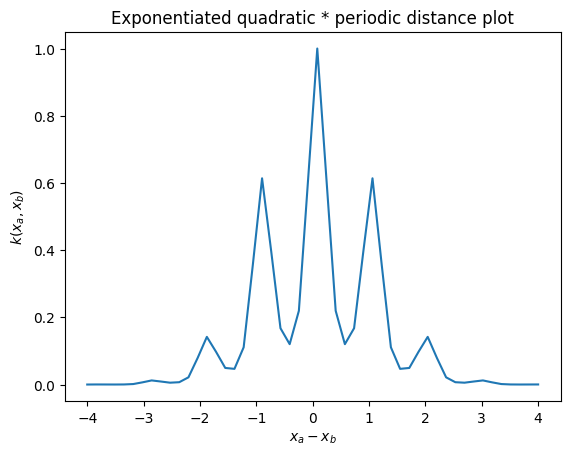

In [17]:
plt.plot(X, COV[25, :], '-', label=f'$l=${1}')
plt.title('Exponentiated quadratic * periodic distance plot')
plt.xlabel(r'$x_a-x_b$')
plt.ylabel(r'$k(x_a,x_b)$')


## Part 2: Self study

In this exercise we will be experimenting with data on atmosoheric CO2 measurements data from Mauna Loa. You can find additional information about the data from the <a href="https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html">here</a>, included the full data set. In this exercise we will be using a slightly cleaned up version of the original dataset.

In [23]:
# co2_df = pd.read_csv(
#     # Source: https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv
#     './monthly_in_situ_co2_mlo.csv',
#     header=0, # Data starts here
#     usecols=[3, 4], # Only keep the 'Date' and 'CO2' columns
#     na_values='-99.99',  # NaNs are denoted as '-99.99'
#     dtype=np.float64,
#     sep=','
# )


ValueError: could not convert string to float: '          '

In [ ]:
# Drop missing values
co2_df.dropna(inplace=True)


In [ ]:
# Split the data into an observed part and a part we want to make predictions for
date_split_predict = 2010
df_observed = co2_df[co2_df.Date < date_split_predict]
print('{} measurements in the observed set'.format(len(df_observed)))
df_predict = co2_df[co2_df.Date >= date_split_predict]
print('{} measurements in the test set'.format(len(df_predict)))


In [ ]:
plt.figure()
plt.plot(df_observed.iloc[:,0].values, df_observed.iloc[:,1].values)
plt.title("In situ air measurements at Mauna Loa, Observatory, Hawaii")


Separate out the input data and the observations

In [ ]:
x_train = df_observed['Date'].values
f_train = df_observed['CO2'].values
x_test = df_predict['Date'].values
f_test = df_predict['CO2'].values


Setup a first shot at a kernel. Scikit learn offers a variety of predifed kernels. An overview of the available kernels can be found <a href="https://scikit-learn.org/stable/modules/gaussian_process.html#kernels-for-gaussian-processes">here</a> and a gentle introduction to Gaussian processes in sklearn can be found <a href="https://scikit-learn.org/stable/modules/gaussian_process.html#">here</a>. In particular, it would be a good idea to consult the kernel section to get a better understanding of the kernel specification below.

In [ ]:
co2_kernel = 50**2*RBF(length_scale=20) + WhiteKernel(noise_level=10, noise_level_bounds="fixed")


With the kernel specified, we can start a Gaussian process model of our training data. 

In [ ]:
f_mean = f_train.mean()
gaussian_process = GaussianProcessRegressor(kernel=co2_kernel, normalize_y=False)
gaussian_process.fit(x_train.reshape(-1,1), f_train - f_mean)


Using our newly learned GP, we can do prediction on the test data.

In [ ]:
mean_f_pred, std_f_pred = gaussian_process.predict(x_test.reshape(-1,1), return_std=True)
mean_f_pred += f_mean


Let's get a feel for the results

In [ ]:
plt.plot(x_train, f_train, '-b')
plt.plot(x_test, f_test, color="tab:blue", alpha=0.4)
plt.plot(x_test, mean_f_pred, '-r')
plt.fill_between(
    x_test.ravel(),
    mean_f_pred - std_f_pred,
    mean_f_pred + std_f_pred,
    color="tab:red",
    alpha=0.2,
)
plt.xlabel("Year")
plt.ylabel("CO$_2$ concentration (ppm)")
_ = plt.title(
    "Monthly average of air samples measurements\nfrom the Mauna Loa Observatory")
plt.show()


Kernel parameters:

In [ ]:
gaussian_process.kernel_


In [ ]:
print(f"RMSE: {np.mean((mean_f_pred - f_test)**2)}")


### Exercise

Our Gaussian process model does clearly not do a good job at capturing the evolution in the CO2 measurements. For one thing, it completely ignores the priodicity in the signal.
1. Construct a new kernel that better captures the CO2 measurements in the test set
2. Use your Gaussian process model to estimate the missing CO2 mesurement values in the dat set. 